<a href="https://colab.research.google.com/github/muthu589/demo/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib deap

In [ ]:
#TASK 1 - Install matplotlib and deap
#       - Import all necessary libraries

import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
# TODO: Task 2 - Define the number of locations and vehicles

num_locations =20 # Define the number of locations (eg 10)

locations =  [(random.randint(0, 100), random.randint(0, 100))for _ in range(num_locations)]   # Create a list of tuples representing location coordinates -
            # try to use a random number generator
            # (x, y) could be between 0 and 100

depot =(50,50) # Define the coordinates for the depot

num_vehicles =3  # Define the number of vehicles - (eg 3)

In [ ]:
# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin", )
creator.create("Individual", )

TypeError: create() missing 1 required positional argument: 'base'

In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)



/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", #finish defining how to build an individual)
toolbox.register("population", #finish defining how to build an population)

In [ ]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
# TASK 5 and 6

def evalVRP(individual):
    # TODO: Task 5 - Write the fitness evaluation function
    #              - Return (total distance, standard deviation)



#TASK 6 - Register the evaluate function in the toolbox

In [ ]:
def evalVRP(individual):
    total_distance = 0
    distances = []
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)

In [ ]:
# TODO: Task 7 - Configure the genetic operators

toolbox.register("mate", # Choose and configure a crossover method)
toolbox.register("mutate", # Choose and configure a mutation method)
toolbox.register("select", # Choose and configure a selection method)

In [ ]:
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
#TASK 8 - Plotting Function
def plot_routes(individual, title="Routes"):
    #TODO: Write a function to visualize the routes - just plot the points and lines for each vehicle




In [ ]:
def plot_routes(individual, title="Routes"):
    plt.figure()
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

In [ ]:
from os import statvfs
def main():
    random.seed(42)
    pop = toolbox.population(n=500)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    statvfs = tools.Statistics(lambda ind: ind.fitness.values)
    Stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=True)
    plot_routes(hof[0])
    return pop, stats, hof

    if __name__ == "__main__":
        main()

gen	nevals	avg   	min    
0  	300   	622.62	3.65755
1  	213   	591.3 	2.2941 
2  	243   	586.285	2.85139
3  	232   	573.141	3.10115
4  	233   	565.029	4.40952
5  	218   	560.187	6.52381
6  	213   	554.485	4.8642 
7  	233   	551.615	5.86406
8  	219   	550.395	1.98283
9  	209   	532.05 	4.3127 
10 	224   	532.357	1.5915 
11 	230   	529.967	4.3127 
12 	230   	522.628	4.3127 
13 	217   	511.908	4.3127 
14 	231   	509.62 	4.3127 
15 	250   	498.367	1.89787
16 	238   	492.883	1.00999
17 	236   	474.653	1.89787
18 	225   	464.716	2.08719
19 	225   	440.412	3.74981
20 	209   	421.948	4.85465
21 	232   	407.751	0.863071
22 	237   	396.735	5.78296 
23 	217   	389.529	5.33599 
24 	227   	380.481	6.48738 
25 	246   	372.639	5.37273 
26 	233   	364.34 	2.74736 
27 	219   	360.535	2.65944 
28 	229   	355.032	2.17813 
29 	223   	348.779	2.65944 
30 	238   	344.346	1.23002 
31 	225   	339.037	2.65944 
32 	221   	336.943	2.65944 
33 	243   	325.874	2.44253 
34 	232   	321.989	2.31208 
35 	244   	316.91

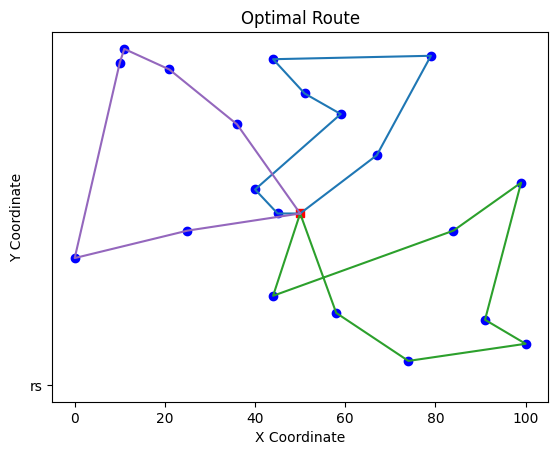

In [ ]:
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()

In [ ]:
# Additional Tasks for the Vehicle Routing Project (Optional but highly recommended)

# 1. Parameter Tuning:
# Task: Vary parameters like population size, mutation rate, or tournament size. Analyze their impact on the results.
# Purpose: Learn the importance of parameter tuning in genetic algorithms and how it affects outcomes.

# 2. Fitness Score Analysis Over Generations:
# Task: Plot the fitness score of the best individual over generations for different configurations.
# Purpose: Visualize and understand the convergence behavior of the algorithm under different settings.

# 3. Solution Diversity Analysis:
# Task: Implement a method to measure and report the diversity of solutions in the population over time.
# Purpose: Explore the balance between exploration and exploitation in genetic algorithms.